# Downloading and building cells from AllenDB

Useful links:
1. [Database](http://celltypes.brain-map.org/data)
2. [Downloading biophysical models](https://allensdk.readthedocs.io/en/latest/biophysical_models.html)
3. [Example on building cells](https://alleninstitute.github.io/AllenSDK/_static/examples/nb/pulse_stimulus.html)

In [1]:
!pip install --upgrade pip
!pip install --quiet allensdk neuron

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.1/973.1 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [2]:
from allensdk.api.queries.biophysical_api import BiophysicalApi
from allensdk.model.biophys_sim.config import Config
from allensdk.model.biophysical.utils import Utils
import os
import json
import matplotlib.pyplot as plt

## Download the cell

In [5]:
bp = BiophysicalApi()
specimen_id = 476686112
# Mouse Layer 5 Primary visual area neuron
# http://celltypes.brain-map.org/experiment/electrophysiology/476686112
bp.get_neuronal_models(specimen_id)

[{'id': 477878284,
  'name': 'Biophysical - perisomatic_Sst-IRES-Cre;Ai14-188740.03.02.01',
  'neuron_reconstruction_id': 491119369,
  'neuronal_model_template_id': 329230710,
  'specimen_id': 476686112},
 {'id': 497232660,
  'name': 'Biophysical - all active_Sst-IRES-Cre;Ai14-188740.03.02.01',
  'neuron_reconstruction_id': 491119369,
  'neuronal_model_template_id': 491455321,
  'specimen_id': 476686112}]

In [6]:
# Download the cell with passive dendrites
bp.cache_stimulus = False # Change to False to not download the large stimulus NWB file
bp.cache_data(477878284) # 'id'

2025-02-13 02:25:15,834 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/657210401
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/657210401
2025-02-13 02:25:15,984 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/657210404
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/657210404
2025-02-13 02:25:16,034 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/395337293
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/395337293
2025-02-13 02:25:16,074 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_fi

## use segregated modfiles

In [7]:
# replace the modfiles with 'segregated' so the ion channels are 100% closed at voltages that they should not be active at
segregate_modfiles = True
if segregate_modfiles:
  import shutil
  shutil.rmtree("modfiles/")
  !git clone -b release_candidate https://github.com/V-Marco/ACT/
  # move the modfiles from the other repo
  # https://github.com/V-Marco/ACT/tree/release_candidate/data/SST/seg/modfiles -> /content/modfiles
  !mv ACT/data/SST/seg/modfiles/ /content/modfiles/

Cloning into 'ACT'...
remote: Enumerating objects: 4382, done.
remote: Counting objects: 100% (409/409), done.
remote: Compressing objects: 100% (292/292), done.
remote: Total 4382 (delta 193), reused 259 (delta 98), pack-reused 3973 (from 1)
Receiving objects: 100% (4382/4382), 153.06 MiB | 20.95 MiB/s, done.
Resolving deltas: 100% (2011/2011), done.


In [8]:
# get synapse modfiles # do here to compile them with the rest.

if not 'vecevent.mod' in os.listdir("modfiles"):
  !git clone https://github.com/davidfague/Neural-Modeling/
  # move the modfiles from the other repo
  # https://github.com/davidfague/Neural-Modeling/tree/release_candidate/data/SST/seg/modfiles/{synapse_modfiles} -> /content/modfiles/

  !mv Neural-Modeling/modfiles/hay/AMPA_NMDA.mod /content/modfiles/
  !mv Neural-Modeling/modfiles/hay/GABA_AB.mod /content/modfiles/
  !mv Neural-Modeling/modfiles/hay/vecevent.mod /content/modfiles/

Cloning into 'Neural-Modeling'...
remote: Enumerating objects: 5118, done.
remote: Counting objects: 100% (287/287), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 5118 (delta 249), reused 214 (delta 203), pack-reused 4831 (from 1)
Receiving objects: 100% (5118/5118), 54.00 MiB | 26.67 MiB/s, done.
Resolving deltas: 100% (3493/3493), done.


## Update the fit.json if needed.

In [9]:
update_fit = True
if update_fit:
  !git clone https://github.com/davidfague/single-cell-tuning.git # get the new file
  !mv single-cell-tuning/476686112_jan_fit.json 476686112_fit.json # replace the file

  # alternatively, change the manifest

Cloning into 'single-cell-tuning'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 33 (delta 15), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 263.29 KiB | 6.42 MiB/s, done.
Resolving deltas: 100% (15/15), done.


## Build the cell

In [227]:
# Compile the modfiles
!nrnivmodl modfiles

/usr/local/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/content
Mod files: "modfiles/modfiles/AMPA_NMDA.mod" "modfiles/modfiles/CaDynamics.mod" "modfiles/modfiles/Ca_HVA.mod" "modfiles/modfiles/Ca_LVA.mod" "modfiles/modfiles/GABA_AB.mod" "modfiles/modfiles/Ih.mod" "modfiles/modfiles/Im.mod" "modfiles/modfiles/Im_v2.mod" "modfiles/modfiles/Kd.mod" "modfiles/modfiles/K_P.mod" "modfiles/modfiles/K_T.mod" "modfiles/modfiles/Kv2like.mod" "modfiles/modfiles/Kv3_1.mod" "modfiles/modfiles/Nap.mod" "modfiles/modfiles/NaTa.mod" "modfiles/modfiles/NaTs.mod" "modfiles/modfiles/NaV.mod" "modfiles/modfiles/SK.mod" "modfiles/modfiles/vecevent.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../modfiles/AMPA_NMDA.mod
 -> NMODL ../modfiles/CaDynamics.mod
 -> NMODL ../modfiles/Ca_HVA.mod
Translating CaDynamics.mod into /content/x86_64/C

In [11]:
# Create the h object
description = Config().load('manifest.json')
utils = Utils(description)
h = utils.h

# Convert all "value" attributes to floats
for dict in utils.description.data['genome']:
    for key, value in dict.items():
        if key == 'value': dict[key] = float(value)

In [12]:
# Configure morphology
manifest = description.manifest
morphology_path = description.manifest.get_path('MORPHOLOGY')
utils.generate_morphology(morphology_path.encode('ascii', 'ignore'))
utils.load_cell_parameters()

warning ./Sst-IRES-Cre_Ai14-188740.03.02.01_657210399_m.swc: more than one tree:
  root at line 4
  root at line 14504
  root at line 14725
  root at line 14798
  root at line 15141
  root at line 15144
  root at line 15156
  root at line 15211
  root at line 15318
  root at line 15496
  root at line 15811
  root at line 15857
  root at line 15883
  root at line 16161
  root at line 16200
  root at line 16210
  root at line 16253
  root at line 16286
  root at line 16301
  root at line 16326
  root at line 16574
  root at line 16613
  root at line 16618
  root at line 16645
  root at line 16695
  root at line 16751
  root at line 16765
  root at line 16768


### MARK1

In [184]:
h.soma[0].diam

25.322799682617188

In [186]:
# Get this from the built cell
computed_soma_area = 5.036323076932052e-06 # (cm2)

In [187]:
user_provided_Rin = 195.4 * 10e6 # (Ohm)
user_provided_tau = 15.6 * 1e-3 # (s)
user_provided_Vrest = -71 # (mV)

In [188]:
g_bar_leak = (1 / user_provided_Rin) / computed_soma_area
cm = user_provided_tau * g_bar_leak * 1e6
print(f"E_leak: {user_provided_Vrest}")
print(f"gbarleak: {g_bar_leak}")
print(f"Cm: {cm}")

E_leak: -71
gbarleak: 0.00010161594458832541
Cm: 1.5852087355778763


In [189]:

fit_filename = os.path.join(f"{specimen_id}_fit.json")

with open(fit_filename,'r') as file:
    data = json.load(file)


#set all sections cm to the same
for item in data['passive']:
    for field in item['cm']:
        field['cm'] = cm


for item in data["genome"]:
  if (item['name'] == 'g_pas'):
    item['value'] = g_bar_leak


#set e_rev_leak in all sections
data['passive'][0]['e_pas'] = user_provided_Vrest

data['conditions'][0]['v_init'] = user_provided_Vrest

with open(fit_filename, 'w') as file:
    json.dump(data, file, indent=4)

Now update those in the fit file. Restart the runtime and rebuild the cell.

### MARK2

In [341]:
# Create the h object
description = Config().load('manifest.json')
utils = Utils(description)
h = utils.h

# Convert all "value" attributes to floats
for dict in utils.description.data['genome']:
    for key, value in dict.items():
        if key == 'value': dict[key] = float(value)

# Configure morphology
manifest = description.manifest
morphology_path = description.manifest.get_path('MORPHOLOGY')
utils.generate_morphology(morphology_path.encode('ascii', 'ignore'))
utils.load_cell_parameters()

warning ./Sst-IRES-Cre_Ai14-188740.03.02.01_657210399_m.swc: more than one tree:
  root at line 4
  root at line 14504
  root at line 14725
  root at line 14798
  root at line 15141
  root at line 15144
  root at line 15156
  root at line 15211
  root at line 15318
  root at line 15496
  root at line 15811
  root at line 15857
  root at line 15883
  root at line 16161
  root at line 16200
  root at line 16210
  root at line 16253
  root at line 16286
  root at line 16301
  root at line 16326
  root at line 16574
  root at line 16613
  root at line 16618
  root at line 16645
  root at line 16695
  root at line 16751
  root at line 16765
  root at line 16768


In [342]:
h.soma[0].diam = h.soma[0].diam * 2

In [343]:
# Set current injection
CI_stim = h.IClamp(h.soma[0](0.5))
CI_stim.amp = -0.2
CI_stim.delay = 300.0
CI_stim.dur = 400.0
h.tstop = 1000.0
h.dt = 0.1
h.steps_per_ms = 1 / h.dt

In [344]:
vec = utils.record_values()

In [345]:
h.finitialize()
h.run()

0.0

Text(0, 0.5, 'Voltage (mV)')

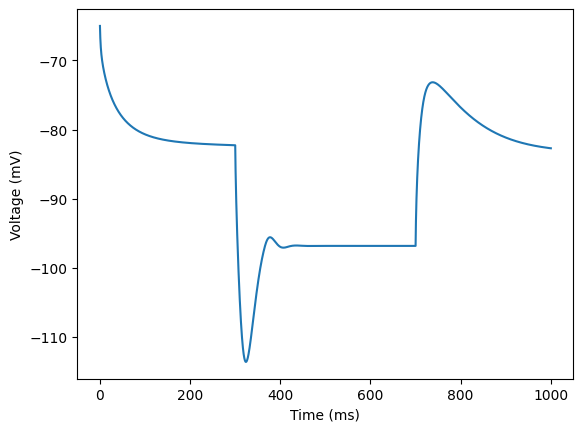

In [346]:
plt.plot(vec['t'].as_numpy(), vec['v'].as_numpy())
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")

In [347]:
# Adjust g-pas to this:
0.00010161594458832541 * 1.5

# + Adjust cm to 2.5

0.00015242391688248812

In [348]:
import numpy as np
def compute_gpp(passive_V: np.ndarray, dt: float, I_t_start: int, I_t_end: int, I_amp: float):
    '''
    Parameters:
    ----------
    I_t_start: float
        Current injection start time (ms).
    '''

    index_V_rest = int(I_t_start / dt) - 1

    # If there is no h channel, V_final == V_trough
    index_V_trough = index_V_rest + np.argmin(passive_V[index_V_rest:])
    index_V_final = int(I_t_end / dt) - 1

    V_rest = passive_V[index_V_rest]
    V_trough = passive_V[index_V_trough]
    V_final = passive_V[index_V_final]

    # R_in
    R_in = (V_rest - V_trough) / (0 - I_amp)

    # Tau1
    V_tau1 = V_rest - (V_rest - V_trough) * 0.632

    index_v_tau1 = next(
                index for index, voltage_value in enumerate(list(passive_V[index_V_rest:]))
                if voltage_value < V_tau1
            )
    tau1 = index_v_tau1 * dt

    # Tau2
    V_tau2 = V_trough - (V_trough - V_final) * 0.632
    index_v_tau2 = next(
                index for index, voltage_value in enumerate(list(passive_V[index_V_trough:]))
                if voltage_value > V_tau2
            )
    tau2 = index_v_tau2 * dt

    # Sag ratio
    sag = (V_final - V_trough) / (V_rest - V_trough)

    gpp = (R_in, tau1, tau2, sag)
    return gpp

In [349]:
#R_in, tau1, tau2, sag_ratio)
trace = vec['v'].as_numpy()

res = list(compute_gpp(trace, h.dt, CI_stim.delay,CI_stim.delay + CI_stim.dur - 5, CI_stim.amp))
res.append(trace[int(CI_stim.delay / h.dt) - 1])
print(f"R_in: {round(res[0],6)}\ntau1: {round(res[1],6)}\ntau2: {round(res[2],6)}\nsag: {round(res[3],6)}\nRMP: {round(res[4],6)}")


R_in: 156.646182
tau1: 8.5
tau2: 24.9
sag: 0.535508
RMP: -82.257515


In [ ]:
# Biophysical properties (mean±SD)


# SST

# RMP (mV)	    -65.75±3.76
# Rm (MOhm)	    188.7±9736
# Cm (pF)	      96.46±50.01
# Tau (ms)	    15.6±8.6
# Sag ratio	    0.85±0.09
# Rheobase (pA)	90±38.25
# Rin (MOhm)	  195.4±75.93

#PV (n=15)
# RMP (mV)      -71.25+5.6
# Rm (MOhm)     88.97±36.3
# Cm (pF)       78±50.18
# Tau (ms)      5.9±2.9
# Sag ratio     0.96±0.02
# Rheobase (pA) 225±112.2
# Rin (MOhm)    98.9±34.48




## Calculating FI

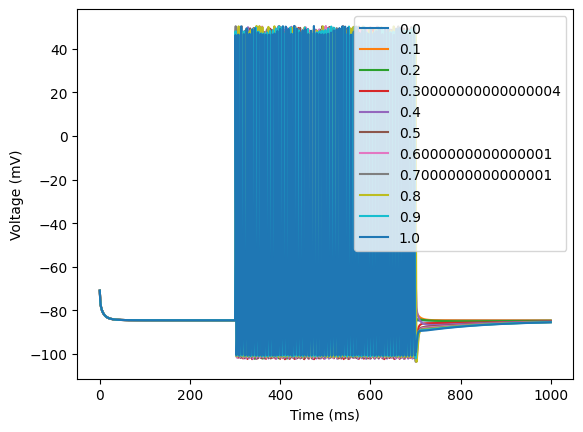

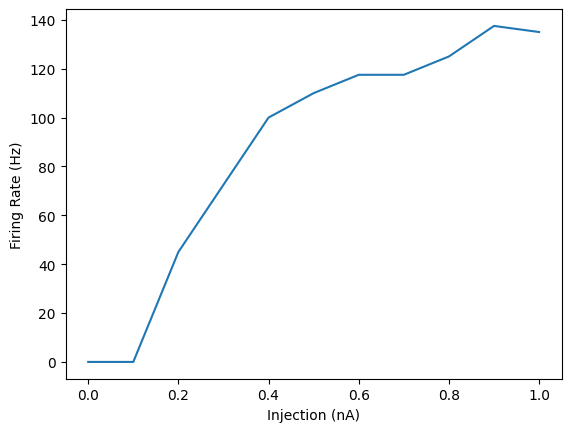

In [ ]:
def count_voltage_events(t, v):
    """
    Counts the number of times the voltage goes above -20 mV and the slope changes from positive to negative.

    Args:
        t: A NumPy array of time points.
        v: A NumPy array of voltage values.

    Returns:
        The number of events.
    """

    # Calculate the slope of the voltage
    slope = np.diff(v)

    # Find the indices where the voltage is above -20 mV
    above_threshold_indices = np.where(v[:-1] > -20)[0]

    # Find the indices where the slope changes from positive to negative
    positive_to_negative_indices = np.where((slope[:-1] > 0) & (slope[1:] < 0))[0]

    # Find the intersection of the two sets of indices
    event_indices = np.intersect1d(above_threshold_indices, positive_to_negative_indices)

    return len(event_indices)

# my code for automatically plotting calculating F/I
import numpy as np
amplitudes = np.arange(0,1.1,0.1)
firing_rates = []

for amp in amplitudes:
  CI_stim.amp = amp

  vec = utils.record_values()

  # simulate
  h.finitialize()
  h.run()

  t = vec['t'].as_numpy()
  v = vec['v'].as_numpy()
  plt.plot(vec['t'].as_numpy(), vec['v'].as_numpy())
  plt.xlabel("Time (ms)")
  plt.ylabel("Voltage (mV)")

  # Call the function to count the events
  num_events = count_voltage_events(t, v)

  firing_rates.append(num_events/(CI_stim.dur/1000))


plt.legend(amplitudes)
plt.show() # voltages

import matplotlib.pyplot as plt
plt.plot(amplitudes, firing_rates)
plt.xlabel("Injection (nA)")
plt.ylabel("Firing Rate (Hz)")
plt.show() # FI

## Adding a synapse

In [ ]:
CI_stim.amp = 0 # turn off current injection

# store in lists to make sure you don't create extra objects when rerunning? #update: it is fine as long as you overwrite the previous python variable
synapses = [] #if 'synapses' not in locals() else synapses
vecstims = [] #if 'vecstims' not in locals() else vecstims
netcons = [] #if 'netcons' not in locals() else netcons

# init synapse
if synapses == []:
  syn = h.AMPA_NMDA(h.soma[0](0.5)) # can change section, segment
  synapses.append(syn)
# change to your synapse. Include your synapse in modfiles/
# can change section, segment

# customize spike train
spike_train = np.array([500])  # [100, 200, 300, 400, 500]) # changing got rid of the other spikes so the first netcon was disabled.

# put spike_train into a hoc vector that can be delivered to synapses
if vecstims == []:
  spike_vec = h.Vector(spike_train)
  stim = h.VecStim()
  stim.play(spike_vec)
  vecstims.append(stim)

# deliver spike_train to synapse using netcon
if netcons == []:
  nc = h.NetCon(stim, syn, 1, 0, 1)
  netcons.append(nc)

In [ ]:
# if you wanna update the spike train without rerunning, use this function to turn off other netcons, and adjust code to create new ones
netcons[0].active() # show current status
# netcons[0].active(False) # inactivate

True

Text(0, 0.5, 'Voltage (mV)')

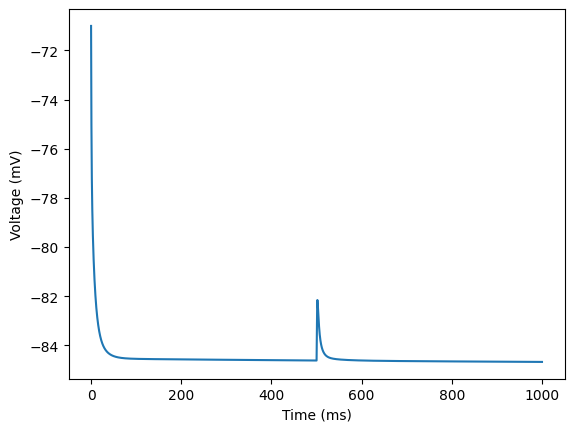

In [ ]:
  vec = utils.record_values()

  # simulate
  h.finitialize()
  h.run()

  t = vec['t'].as_numpy()
  v = vec['v'].as_numpy()
  plt.plot(vec['t'].as_numpy(), vec['v'].as_numpy())
  plt.xlabel("Time (ms)")
  plt.ylabel("Voltage (mV)")

## Homework

1. Choose any active mouse cell model from the [database](http://celltypes.brain-map.org/data). When searching, put "Has All-active Biophysical model" on.
2. Simulate the cell for different values of current injection (CI). Plot voltage responses (t vs V) for each CI. Then plot the FI curve.